In [1]:
# 결과 확인을 용이하게 하기 위한 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# 선형 회귀 (Linear Regression)

## 기본 셋팅

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# 현재 실습하고 있는 Python 코드를 재실행해도 같은 결과가 나오도록 random seed 설정하기
torch.manual_seed(1)

## 변수 선언

In [5]:
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])

print(x_train)
print(x_train.shape)
print(y_train)
print(y_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])
tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


## 가중치와 편향의 초기화 (W, b)

In [7]:
# 가중치 W를 0으로 초기화하고 학습을 통해 값이 변경되는 변수임을 명시(requires_grad = True)함
W = torch.zeros(1, requires_grad = True)
print(W)

# 편향 b를 0으로 초기화하고 학습을 통해 값이 변경되는 변수임을 명시(requires_grad = True)함
b = torch.zeros(1, requires_grad = True)
print(b)

tensor([0.], requires_grad=True)
tensor([0.], requires_grad=True)


## 가설 세우기

In [9]:
hypothesis = x_train * W + b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


## 비용 함수 선언하기
- linear regression의 cost function으로 MSE(평균제곱오차)를 사용할 것임

In [10]:
# (예측값 - 실제값)^2 / n 
cost = torch.mean((hypothesis - y_train) ** 2)
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


## 경사 하강법 구현하기
- SGD(Stochastic Gradient Descent) : 경사 하강법의 일종
- lr(learning rate) : 학습률
- 학습 대상인 W, b가 SGD의 입력이 됨

In [12]:
optimizer = optim.SGD([W, b], lr=0.01)

- `optimizer.zero_grad()`를 실행함으로써 미분을 통해 얻은 기울기를 0으로 초기화함
- 기울기를 초기화해야만 새로운 가중치 편향에 대해서 새로운 기울기를 구할 수 있음
- 그 다음 `cost.backward()` 함수를 호출하면 가중치 W, 편향 b에 대한 기울기가 계산됨
- 그 다음 경사 하강법 최적화 함수 optimizer의 `.step()` 함수를 호출하여 인수로 들어갔던 W, b에서 return되는 변수들의 기울기에 학습률 0.01을 곱하여 빼줌으로써 업데이트함

In [13]:
# gradient를 0으로 초기화
optimizer.zero_grad()

# 비용 함수를 미분하여 gradient 계산
cost.backward()

# W, b 업데이트
optimizer.step()

## 전체 코드

In [19]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1999 # 원하는 만큼 경사 하강법을 반복
for epoch in range(nb_epochs+1):
    
    # H(x) 계산
    hypothesis = x_train * W + b
    
    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(epoch, nb_epochs, W.item(), b.item(), cost.item()))

Epoch    0/1999 W: 0.187, b: 0.080 Cost: 18.666666
Epoch  100/1999 W: 1.746, b: 0.578 Cost: 0.048171
Epoch  200/1999 W: 1.800, b: 0.454 Cost: 0.029767
Epoch  300/1999 W: 1.843, b: 0.357 Cost: 0.018394
Epoch  400/1999 W: 1.876, b: 0.281 Cost: 0.011366
Epoch  500/1999 W: 1.903, b: 0.221 Cost: 0.007024
Epoch  600/1999 W: 1.924, b: 0.174 Cost: 0.004340
Epoch  700/1999 W: 1.940, b: 0.136 Cost: 0.002682
Epoch  800/1999 W: 1.953, b: 0.107 Cost: 0.001657
Epoch  900/1999 W: 1.963, b: 0.084 Cost: 0.001024
Epoch 1000/1999 W: 1.971, b: 0.066 Cost: 0.000633
Epoch 1100/1999 W: 1.977, b: 0.052 Cost: 0.000391
Epoch 1200/1999 W: 1.982, b: 0.041 Cost: 0.000242
Epoch 1300/1999 W: 1.986, b: 0.032 Cost: 0.000149
Epoch 1400/1999 W: 1.989, b: 0.025 Cost: 0.000092
Epoch 1500/1999 W: 1.991, b: 0.020 Cost: 0.000057
Epoch 1600/1999 W: 1.993, b: 0.016 Cost: 0.000035
Epoch 1700/1999 W: 1.995, b: 0.012 Cost: 0.000022
Epoch 1800/1999 W: 1.996, b: 0.010 Cost: 0.000013
Epoch 1900/1999 W: 1.997, b: 0.008 Cost: 0.000008

- 결과적으로 훈련과정에서 W, b는 훈련 데이터와 잘 맞는 직선을 표현하기 위한 적절한 값으로 변화해감


- Epoch : 전체 훈련 데이터가 학습에 한 번 사용된 주기
- 이번 실습에서는 2,000번 수행함


- 최종 훈련 결과를 보면 최적의 기울기 W는 2에 가깝고, b는 0에 가까움
- 현재 훈련 데이터가 x_train은 [[1], [2], [3]]이고 y_train은 [[2], [4], [6]]인 것을 감안하면 실제 정답은 W가 2이고, b가 0인 H(x)=2x이므로 거의 정답을 찾은 셈임

## `optimizer.zero_grad()`가 필요한 이유
- PyTorch는 미분을 통해 얻은 기울기를 이전에 얻은 기울기 값에 누적시키는 특징이 있음

In [27]:
import torch
w = torch.tensor(2.0, requires_grad=True)

# optimizer = optim.SGD([w, b], lr=0.01)

nb_epochs = 20
for epoch in range(nb_epochs + 1):
    
    z = 2*w
#     optimizer.zero_grad()
    z.backward()
    print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 2.0
수식을 w로 미분한 값 : 4.0
수식을 w로 미분한 값 : 6.0
수식을 w로 미분한 값 : 8.0
수식을 w로 미분한 값 : 10.0
수식을 w로 미분한 값 : 12.0
수식을 w로 미분한 값 : 14.0
수식을 w로 미분한 값 : 16.0
수식을 w로 미분한 값 : 18.0
수식을 w로 미분한 값 : 20.0
수식을 w로 미분한 값 : 22.0
수식을 w로 미분한 값 : 24.0
수식을 w로 미분한 값 : 26.0
수식을 w로 미분한 값 : 28.0
수식을 w로 미분한 값 : 30.0
수식을 w로 미분한 값 : 32.0
수식을 w로 미분한 값 : 34.0
수식을 w로 미분한 값 : 36.0
수식을 w로 미분한 값 : 38.0
수식을 w로 미분한 값 : 40.0
수식을 w로 미분한 값 : 42.0


- 계속해서 미분값인 2가 누적되는 것을 볼 수 있음
- 그렇기 때문에 `optimizer.zero_grad()`를 통해 미분값을 계속 0으로 초기화시켜줘야 함

## `torch.manual_seed()`를 하는 이유
- `torch.manual_seed()`를 사용한 프로그램의 결과는 다른 컴퓨터에서 실행시켜도 동일한 결과를 얻을 수 있음
- 그 이유는 `torch.manual_seed()`는 난수 발생 순서와 값을 동일하게 보장해주기 때문임
- 우선 랜덤 시드가 3일 때 두 번 난수를 발생시켜보고 다른 랜덤 시드를 사용한 후 다시 랜덤 시드를 3을 사용하면 난수 발생값이 동일하게 나오는지 살펴보기

In [30]:
import torch

In [31]:
torch.manual_seed(3)
print('random seed : 3')
for i in range(1,3):
    print(torch.rand(1))

random seed : 3
tensor([0.0043])
tensor([0.1056])


In [32]:
torch.manual_seed(5)
print('random seed : 5')
for i in range(1,3):
    print(torch.rand(1))

random seed : 5
tensor([0.8303])
tensor([0.1261])


In [33]:
import torch

torch.manual_seed(3)
print('random seed : 3')
for i in range(1,3):
    print(torch.rand(1))

random seed : 3
tensor([0.0043])
tensor([0.1056])


- 텐서에는 requires_grad라는 속성이 있음
- 이것을 True로 설정하면 자동 미분 기능이 적용됨
- 선형 회귀부터 신경망과 같은 복잡한 구조에서 파라미터들이 모두 이 기능이 적용됨
- requires_grad = True가 적용된 텐서에 연산을 하면, 계산 그래프가 생성되며 backward 함수를 호출하면 그래프로부터 자동으로 미분이 계산됨

# [자동 미분 (Autograd)](https://wikidocs.net/60754)
- 경사 하강법 코드를 보고있으면 `requires_grad=True`, `backward()`등이 나옴
- 이는 파이토치에서 제공하고 있는 자동 미분(Autograd) 기능을 수행하고 있는 것임
- 파이토치의 학습 과정을 보다 더 잘 이해하기 위해서 자동 미분에 대해 이해해보자

## 경사 하강법 리뷰

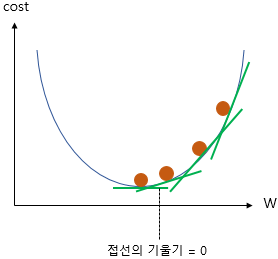


- 경사 하강법은 비용 함수를 미분하여 이 함수의 기울기(gradient)를 구해서 비용이 최소화 되는 방향을 찾아내는 알고리즘이었음
- 비용 함수를 손실 함수, 오차 함수라고도 부르므로 비용 or 손실 or 오차가 최소화 되는 방향이라고 설명할 수 있음
- 모델이 복잡해질수록 경사 하강법을 numpy 등으로 직접 코딩하는 것은 까다로운 일임
- PyTorch에서는 이런 수고를 하지 않도록 자동 미분(Autograd)을 지원함
- 자동 미분을 사용하면 미분 계산을 자동화하여 경사 하강법을 손쉽게 사용할 수 있게 해줌

## 자동 미분 (Autograd) 실습하기
- 자동 미분에 대해서 실습을 통해 이해해볼 것임
- 임의로 `2w^2+5`라는 식을 세워보고, `w`에 대해 미분해볼 것임

In [34]:
import torch

- 값이 2인 임의의 스칼라 텐서 w를 선언함
- 이 때 `required_grad`를 True로 설정함
    - 이는 이 텐서에 대한 기울기를 저장하겠다는 의미임
    - 이렇게 하면 `w.grad`에 w에 대한 미분값이 저장됨

In [35]:
w = torch.tensor(2.0, requires_grad = True)

- 수식을 정의하면 아래와 같음

In [36]:
z = 2 * (w ** 2) + 5

- 해당 수식을 w에 대해서 미분해야 함
- `.backward()`를 호출하면 해당 수식의 w에 대한 기울기를 계산함

In [37]:
z.backward()

- 이제 `w.grad`를  출력하면 w가 속한 수식을 w로 미분한 값이 저장된 것을 확인할 수 있음

In [38]:
print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 8.0


# [다중 선형 회귀 (Multivariable Linear Regression)](https://wikidocs.net/54841)
- 앞서 배운 x가 1개인 선형 회귀를 단순 선형 회귀(Simple Linear Regression)라고 함
- 이번 챕터에서는 다수의 x로부터 y를 예측하는 다중 선형 회귀(Multivariable Linear Regression)에 대해서 이해할 것임

## 데이터에 대한 이해 (Data Definition)
- 다음과 같은 훈련 데이터가 있음
- 앞서 배운 단순 선형 회귀와 다른 점은 독립 변수 x의 개수가 1개가 아닌 3개라는 점임
- 3개의 퀴즈 점수로부터 최종 점수를 예측하는 모델을 만들어볼 것임

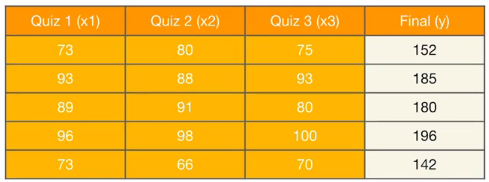

- 독립 변수 x의 개수가 3개므로 이를 수식으로 표현하면 아래와 같음
- H(x) = w1 * x1 + w2 * x2 + w3 * x3 + b

## 파이토치로 구현하기

In [39]:
# 필요한 도구들을 import 하고 random seed 고정하기
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [40]:
torch.manual_seed(1)

In [41]:
# 훈련 데이터
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [43]:
# 가중치 w와 편향 b 초기화
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)

In [49]:
# hypothesis, cost function, optimizer를 선언한 후에 경사 하강법을 1,000회 반복하기
# optimizer 설정
optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)

nb_epochs = 1000
for epoch in range(nb_epochs + 1): # 0 ~ 1000
    
    # H(x) 계산
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b
    
    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()))

Epoch    0/1000 w1: 0.459 w2: 0.458 w3: 0.464 b: 0.005 Cost: 9298.520508
Epoch  100/1000 w1: 0.674 w2: 0.661 w3: 0.676 b: 0.008 Cost: 1.562956
Epoch  200/1000 w1: 0.679 w2: 0.655 w3: 0.677 b: 0.008 Cost: 1.496956
Epoch  300/1000 w1: 0.684 w2: 0.649 w3: 0.677 b: 0.008 Cost: 1.434419
Epoch  400/1000 w1: 0.689 w2: 0.643 w3: 0.678 b: 0.008 Cost: 1.375137
Epoch  500/1000 w1: 0.695 w2: 0.638 w3: 0.678 b: 0.009 Cost: 1.318958
Epoch  600/1000 w1: 0.699 w2: 0.633 w3: 0.679 b: 0.009 Cost: 1.265697
Epoch  700/1000 w1: 0.704 w2: 0.627 w3: 0.679 b: 0.009 Cost: 1.215217
Epoch  800/1000 w1: 0.709 w2: 0.622 w3: 0.679 b: 0.009 Cost: 1.167349
Epoch  900/1000 w1: 0.714 w2: 0.617 w3: 0.680 b: 0.009 Cost: 1.121989
Epoch 1000/1000 w1: 0.718 w2: 0.612 w3: 0.680 b: 0.009 Cost: 1.078961


위의 경우 가설을 선언하는 부분인 hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b에서도 x_train의 개수만큼 w와 곱해주도록 작성해준 것을 확인할 수 있음

## 행렬 연산을 고려하여 파이토치로 구현하기

In [50]:
x_train = torch.FloatTensor([[73, 80, 75],
                            [93, 88, 93],
                            [89, 91, 80],
                            [96, 98, 100],
                            [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

In [51]:
print(x_train.shape)
print(y_train.shape)

torch.Size([5, 3])
torch.Size([5, 1])


In [52]:
# 가중치와 편향 선언
W = torch.zeros((3, 1), requires_grad = True)
b = torch.zeros(1, requires_grad = True)

- 여기서 주목할 점은 가중치 W의 크기가 (3 × 1) 벡터라는 점임
- 행렬의 곱셈이 성립되려면 곱셈의 좌측에 있는 행렬의 열의 크기와 우측에 있는 행렬의 행의 크기가 일치해야 함
- 현재 X_train의 행렬의 크기는 (5 × 3)이며, W 벡터의 크기는 (3 × 1)이므로 두 행렬과 벡터는 행렬곱이 가능함
- 행렬곱으로 가설을 선언하면 아래와 같음

In [53]:
hypothesis = x_train.matmul(W) + b

- 가설을 행렬곱으로 간단히 정의하였음
- 이는 앞서 x_train과 w의 곱셈이 이루어지는 각 항을 전부 기재하여 가설을 선언했던 것과 대비됨
- 이 경우, 사용자가 독립 변수 x의 수를 후에 추가적으로 늘리거나 줄이더라도 위의 가설 선언 코드를 수정할 필요가 없음
- 이제 해야할 일은 비용 함수와 옵티마이저를 정의하고 정해진 에포크만큼 훈련을 진행하는 일임
- 이를 반영한 전체 코드는 다음과 같음

In [56]:
x_train  =  torch.FloatTensor([[73,  80,  75], 
                               [93,  88,  93], 
                               [89,  91,  80], 
                               [96,  98,  100],   
                               [73,  66,  70]])  
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

# 모델 초기화
W = torch.zeros((3, 1), requires_grad=True) # x_train과 연산하기 위한 shape이 맞아야 함 
b = torch.zeros(1, requires_grad=True) # 나중에 broadcasting 됨

# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):

    # H(x) 계산
    # 편향 b는 브로드 캐스팅되어 각 샘플에 더해집니다.
    hypothesis = x_train.matmul(W) + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
        epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()))

Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 hypothesis: tensor([66.7178, 80.1701, 76.1025, 86.0194, 61.1565]) Cost: 9537.694336
Epoch    2/20 hypothesis: tensor([104.5421, 125.6208, 119.2478, 134.7862,  95.8280]) Cost: 3069.590088
Epoch    3/20 hypothesis: tensor([125.9858, 151.3882, 143.7087, 162.4333, 115.4844]) Cost: 990.670898
Epoch    4/20 hypothesis: tensor([138.1429, 165.9963, 157.5768, 178.1071, 126.6283]) Cost: 322.482086
Epoch    5/20 hypothesis: tensor([145.0350, 174.2780, 165.4395, 186.9928, 132.9461]) Cost: 107.717064
Epoch    6/20 hypothesis: tensor([148.9423, 178.9730, 169.8976, 192.0301, 136.5279]) Cost: 38.687496
Epoch    7/20 hypothesis: tensor([151.1574, 181.6346, 172.4254, 194.8856, 138.5585]) Cost: 16.499043
Epoch    8/20 hypothesis: tensor([152.4131, 183.1435, 173.8590, 196.5043, 139.7097]) Cost: 9.365656
Epoch    9/20 hypothesis: tensor([153.1250, 183.9988, 174.6723, 197.4217, 140.3625]) Cost: 7.071114
Epoch   10/20 hyp

# [nn.Module로 구현하는 선형 회귀](https://wikidocs.net/55409)
- 이전 챕터까지는 선형 회귀를 좀 더 직접적으로 이해하기 위해 가설, 비용 함수를 직접 정의해서 선형 회귀 모델을 구현했음
- 이번에는 파이토치에서 이미 구현되어져 제공되고 있는 함수들을 불러오는 것으로 더 쉽게 선형 회귀 모델을 구현해 볼 것임


- 예를 들어 파이토치에서는 선형 회귀 모델이 `nn.Linear()`, 평균 제곱오차가 `nn.functional.mse_loss()`라는 함수로 구현되어있음
- 아래는 이번 실습에서 사용할 두 함수의 사용 예제를 간단히 보여줌

In [ ]:
import torch.nn as nn
model = nn.Linear(input_dim, output_dim)

In [ ]:
import torch.nn.functional as F
cost = F.mse_loss(prediction, y_train)

## 단순 선형 회귀 구현하기

In [76]:
import torch
import torch.nn as nn
import torch.nn.functional as F

torch.manual_seed(1)

- 이제 데이터를 선언함
- 아래 데이터는 y=2x를 가정한 상태에서 만들어진 데이터로 우리는 이미 정답이 W=2, b=0임을 알고 있는 상태임
- 모델이 이 두 W와 b의 값을 제대로 찾아내도록 하는 것이 목표!

In [77]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

- 데이터를 정의하였으니 이제 선형 회귀 모델을 구현할 차례임
- `nn.Linear()`는 입력의 차원, 출력의 차원을 인수로 받음

In [78]:
# 모델을 선언 및 초기화. 단순 선형 회귀이므로 input_dim=1, output_dim=1.
model = nn.Linear(1,1)

- 위 `torch.nn.Linear` 인자로 1, 1을 사용함
- 하나의 입력 x에 대해서 하나의 출력 y를 가지므로 입력 차원과 출력 차원 모두 1을 인수로 사용함
- model에는 가중치 W와 편향 b가 저장되어있음
- 이 값은 `model.parameters()`라는 함수를 사용하여 불러올 수 있음

In [79]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


- 2개의 값이 출력되는데 첫번째 값이 W고, 두번째 값이 b임
- 두 값 모두 현재는 랜덤 초기화가 된 상태임
- 그리고 두 값 모두 학습의 대상이므로 `requires_grad=True`로 설정해주기


- 이제 optimizer를 정의할 것임
- `model.parameters()`를 사용하여 W, b를 전달함
- learning rate : 0.01로 설정

In [80]:
# optimizer 설정
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [81]:
# 전체 훈련 데이터에 대해 경사 하강법을 2,000회 반복
nb_epochs = 2000
for epoch in range(nb_epochs+1):
    
    # H(x) 계산
    prediction = model(x_train)
    
    # cost 계산
    cost = F.mse_loss(prediction, y_train) # F.mse_loss : PyTorch에서 제공하는 평균 제곱 오차 함수
    
    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    
    # 비용 함수를 미분하여 gradient 계산
    cost.backward() # backward 계산
    
    # W, b를 업데이트
    optimizer.step()
    
    if epoch % 100 == 0:
        # 100번마다 로그 출력
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


- 학습이 완료되었는데 Cost의 값이 매우 작음
- W와 b의 값도 최적화가 되었는지 확인해보기
- x에 임의의 값 4를 넣어 모델이 예측하는 y의 값을 확인해보기

In [82]:
# 임의의 입력 4를 선언
new_var =  torch.FloatTensor([[4.0]]) 

# 입력한 값 4에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var) # forward 연산

# y = 2x 이므로 입력이 4라면 y가 8에 가까운 값이 나와야 제대로 학습이 된 것
print("훈련 후 입력이 4일 때의 예측값 :", pred_y) 

훈련 후 입력이 4일 때의 예측값 : tensor([[7.9989]], grad_fn=<AddmmBackward0>)


- 사실 이 문제의 정답은 y=2x가 정답이므로 y값이 8에 가까우면 W와 b의 값이 어느정도 최적화가 된 것임
- 실제로 예측된 y값은 7.9989로 8에 매우 가까움


- 학습 후의 W, b의 값을 출력해보면..

In [83]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.9994]], requires_grad=True), Parameter containing:
tensor([0.0014], requires_grad=True)]


- W의 값이 2에 가깝고, b의 값이 0에 가까움 -> 모델 훈련이 잘 되었다고 볼 수 있음


- H(x)식에 입력 x로부터 예측된 y를 얻는 것을 forward 연산이라고 함
- 학습 전 `prediction = model(x_train)`은 x_train으로부터 예측값을 리턴하므로 forward 연산
- 학습 후 `pred_y = model(new_var)`는 임의의 값 new_var로부터 예측값을 리턴하므로 forward 연산
- 학습 과정에서 비용 함수를 미분하여 기울기를 구하는 것을 backward 연산
- `cost.backward()`는 비용 함수로부터 기울기를 구하라는 의미이며 backward 연산